In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler  <--  this is to normalize data before applying Kmeans
from sklearn.cluster import KMeans

%matplotlib ipympl

In [2]:
# Read the dataset of rfm scores, produced by 3x kmeans
rfm_scores = pd.read_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_kmeans.csv')

In [3]:
# There are 11 segments in total
champions = [555, 554, 544, 545, 454, 455, 445]
loyal = [543, 444, 435, 355, 354, 345, 344, 335]
potential_loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
new_customers = [512, 511, 422, 421, 412, 411, 311]
promising = [525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313]
need_attention = [535, 534, 443, 434, 343, 334, 325, 324]
about_to_sleep = [331, 321, 312, 221, 213, 231, 241, 251]
cannot_lose_them_but_losing = [155, 154, 144, 214, 215, 115, 114, 113]
at_risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
hibernating = [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]
lost = [111, 112, 121, 131, 141, 151]

segments_names = ["champions","loyal","potential_loyalist","new_customers","promising","need_attention","about_to_sleep","cannot_lose_them_but_losing","at_risk","hibernating","lost"]

segments = [champions,loyal,potential_loyalist,new_customers,promising,need_attention,about_to_sleep,cannot_lose_them_but_losing,at_risk,hibernating,lost] 

In [4]:
segments_flat = sum(segments, [])
len(set(segments_flat)) # should equal 5^3

125

In [5]:
rfm_scores["segment"] = rfm_scores["score"]

In [6]:
# customers_per_segment is a dictionary of lists. Each list corresponds to the customers of each segment
customers_per_segment = {}
for s in range(len(segments)):
    customers_this_segment = []
    for id in rfm_scores.index:
        if rfm_scores["score"][id] in segments[s]:
            customers_this_segment.append(rfm_scores["Customer ID"][id])
            rfm_scores["segment"][id] = s
    customers_per_segment[s] = customers_this_segment

C:\Users\argyr\AppData\Local\Temp\ipykernel_13400\127741890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_scores["segment"][id] = s


In [7]:
rfm_scores.head()

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered,score,segment
0,12346,432.0,34.0,368.36,5,2,5,525,4
1,12347,3.0,222.0,4921.53,3,1,5,315,4
2,12348,76.0,51.0,2019.40,3,2,5,325,5
3,12349,19.0,179.0,4419.49,3,2,5,325,5
4,12350,311.0,17.0,334.40,2,2,5,225,8


In [8]:
for key, value_list in customers_per_segment.items():
    print(f"{key}: {len(value_list)}")

0: 1
1: 31
2: 152
3: 10
4: 2459
5: 2002
6: 10
7: 24
8: 1148
9: 11
10: 0


In [9]:
# Plot the clusters in 3D
def scatter_clusters_3d(rfm_v_data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        rfm_v_data['Recency'], rfm_v_data['Frequency'], rfm_v_data['Monetary'],
        c=rfm_v_data['segment'], cmap='jet', marker='o'
    )

    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    ax.set_title('RFM segments')



    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)


    plt.show()

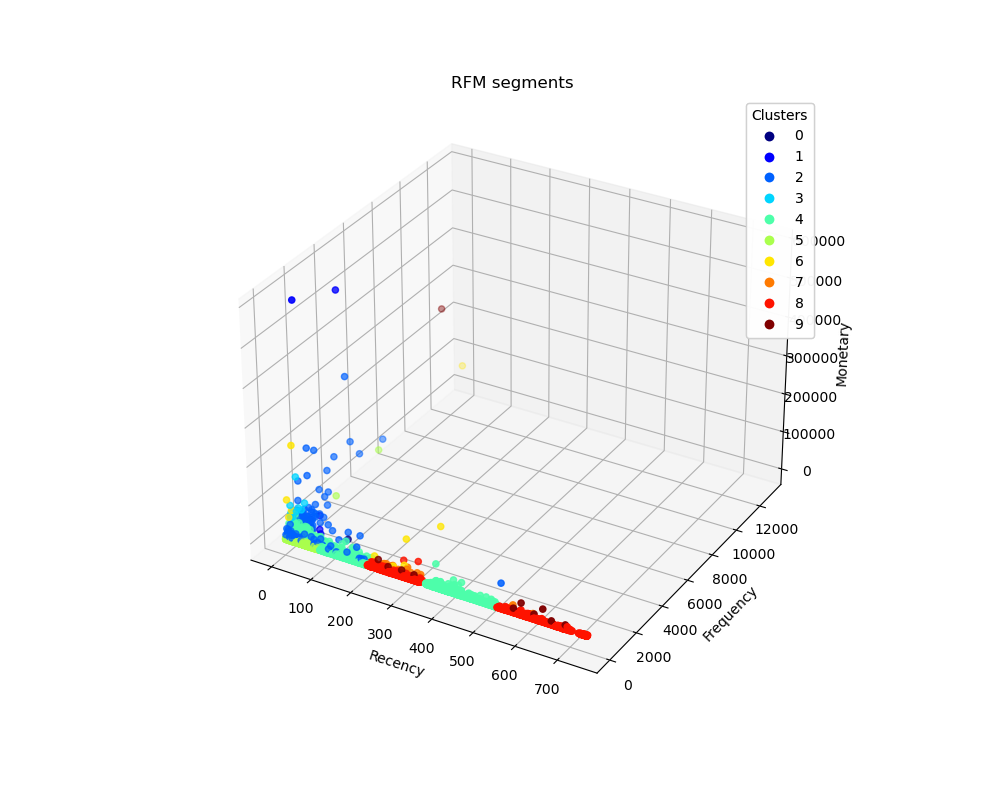

In [10]:
scatter_clusters_3d(rfm_scores)